In [13]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [14]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


Text(0.5, 1.0, 'Forest Cover Type Distribution')

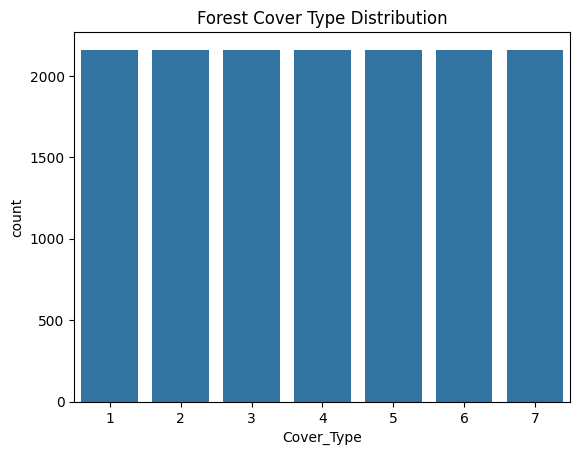

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Cover_Type',data=df)
plt.title('Forest Cover Type Distribution')

In [16]:
x = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8756613756613757
[[328  60   0   0  13   0  20]
 [ 82 304  14   0  29   8   1]
 [  0   1 362  19   2  44   0]
 [  0   0   5 441   0   3   0]
 [  1   6  10   0 396   3   0]
 [  0   3  27  13   1 388   0]
 [ 10   1   0   0   0   0 429]]
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       421
           2       0.81      0.69      0.75       438
           3       0.87      0.85      0.86       428
           4       0.93      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.90      0.88       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024



Text(0.5, 1.0, 'Top 10 Important Features')

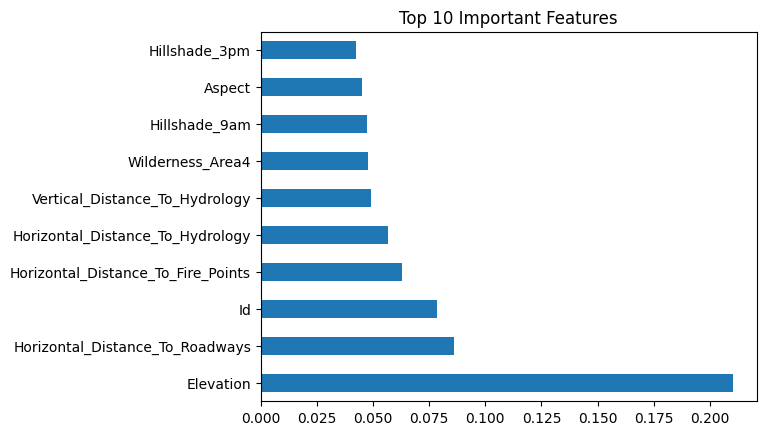

In [23]:
importances = model.feature_importances_
features = pd.Series(importances, index=x.columns)
features.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
